### Exercises

Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Do your work in a notebook named explore_telco. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env

from sklearn.model_selection import train_test_split

import sklearn.preprocessing

import acquire
import prepare
from wrangle import wrangle_telco
import explore
import warnings
warnings.filterwarnings("ignore")

1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [13]:
df = wrangle_telco()

In [14]:
df.head(5)

,customer_id,monthly_charges,total_charges,tenure
0,0013-SMEOE,109.70,7904.25,71
1,0014-BMAQU,84.65,5377.80,63
2,0016-QLJIS,90.45,5957.90,65
3,0017-DINOC,45.20,2460.55,54
4,0017-IUDMW,116.80,8456.75,72


In [16]:
df.shape

(1695, 4)

In [19]:
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)

In [20]:
train.shape, validate.shape, test.shape

((953, 4), (318, 4), (424, 4))

In [23]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'orange'}}) 

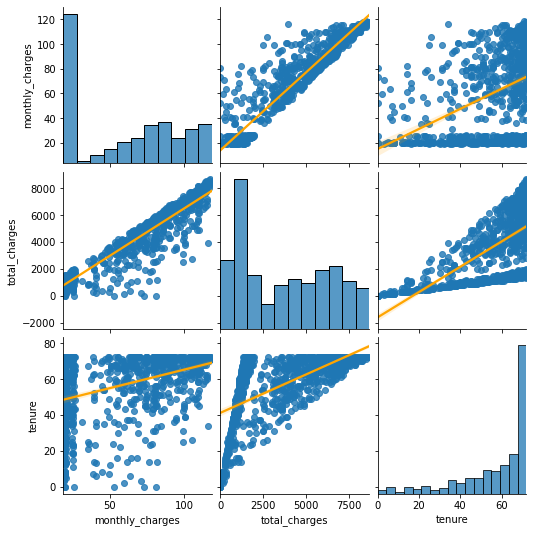

In [24]:
plot_variable_pairs(train)

2. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [29]:
def months_to_years(df):
    df['tenure_years'] = (df.tenure/12).round(0)
    return df
months_to_years(train)
train.head()

,customer_id,monthly_charges,total_charges,tenure,tenure_years
559,3400-ESFUW,57.55,3046.40,55,5.0
940,5707-ZMDJP,69.70,3729.60,53,4.0
1320,7799-LGRDP,25.70,1188.20,43,4.0
887,5338-YHWYT,61.45,2302.35,37,3.0
1212,7176-WRTNX,114.95,7711.25,70,6.0


In [26]:
#Another way:
#def months_to_years(df):
    #df['tenure_years'] = (df.tenure//12)
    #return df
    
#months_to_years(train).head()

3. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [38]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    sns.barplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.swarmplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.boxplot(data=df, y=continuous_var, x=categorical_var)

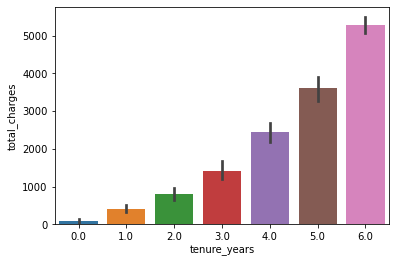

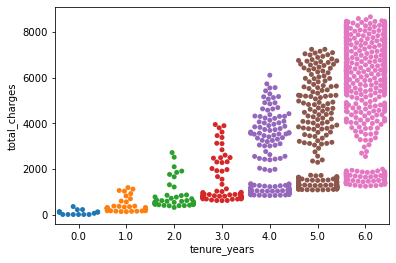

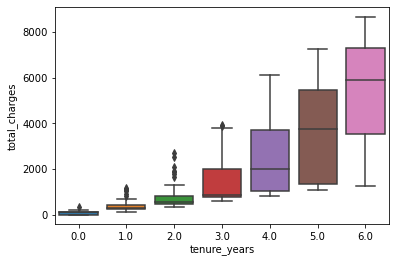

In [41]:
explore.plot_categorical_and_continuous_vars(train,'tenure_years','total_charges')

4. Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.

5. Explore your dataset with any other visualizations you think will be helpful.

(0.0, 4.0)

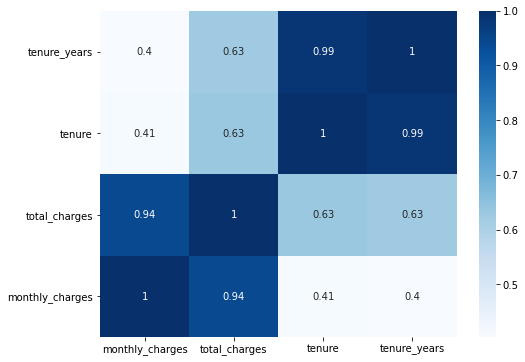

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.ylim(0, 4)

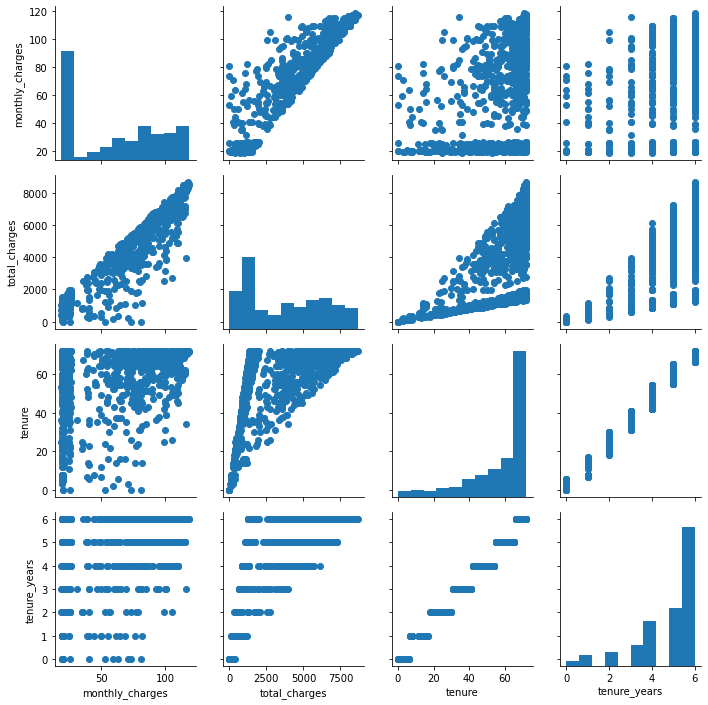

In [43]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

<AxesSubplot:xlabel='tenure_years', ylabel='monthly_charges'>

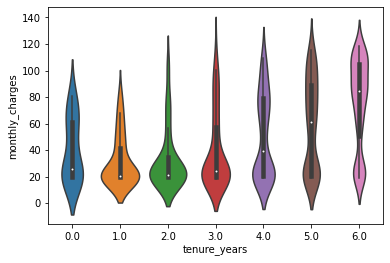

In [46]:
sns.violinplot(x="tenure_years", y="monthly_charges", data=train)